In [3]:
import numpy as np
import pandas as pd


In [59]:
def markov_chain_forward(n, states):
    k = np.random.randint(low= 1, high = n-1)
    swap1 = np.random.randint(low=0, high = 2) ###output 0, 1
    swap2 = np.random.randint(low=0, high = 2) ###output 0, 1
    ##swap from left to right should be good
    try:
        ####k is original k
        #### states[k-1]: kth state, states[k]: k+1 state 
        
        #max k can be n-2
        if states[k][swap2] < k: 

            states[k-1][swap1], states[k][swap2] = states[k][swap2], states[k-1][swap1]
            return True
        else:

            return False
    except:

            states[k-1][swap1], states[k][swap2] = states[k][swap2], states[k-1][swap1]
            return True


In [107]:
n = 3
# states = [['C', 'C'],['A', 'G'], ['T', 1], ['T', 2], ['A', 4], [3,5], ['A', 6]]
coalescent_times = [.15, .6, 2]
states = [['A', 'A'],['C', 'T'], [1, 2]]

# coalescent_times = [2,5,6,8,13,19,29]
mmap = {'A':0, 'C':1, 'G':2, 'T':3}
q = np.ones((4,4))/3
for i in range(4):
    q[i,i]= -1
evals, evecs = la.eig(q)
evec_inv = la.inv(evecs)

states

[['A', 'A'], ['C', 'T'], [1, 2]]

In [139]:
l = []
simulations = []
from copy import deepcopy
for i in range(50):
    states[0][0] = np.random.choice(['A','C','G','T'])
    states[0][1] = np.random.choice(['A','C','G','T'])
    states[1][0] = np.random.choice(['A','C','G','T'])
    states[1][1] = np.random.choice(['A','C','G','T'])
    
    print(i, 'loop')
    print(states)
    s = deepcopy(states)
    l.append(likelihood(s, 3))
    p = 0
    for j in range(100000):
        if j %20000 == 0:
            print(j//20000, 'iter')
        p += mc_probability(s, coalescent_times)[0]
    simulations.append(p/100000)
#         markov_chain_forward(n, states)
    

0 loop
[['C', 'T'], ['A', 'A'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
1 loop
[['A', 'C'], ['G', 'T'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
2 loop
[['T', 'A'], ['T', 'G'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
3 loop
[['G', 'C'], ['C', 'C'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
4 loop
[['C', 'C'], ['G', 'C'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
5 loop
[['T', 'G'], ['C', 'C'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
6 loop
[['C', 'C'], ['C', 'A'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
7 loop
[['T', 'G'], ['A', 'A'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
8 loop
[['A', 'G'], ['A', 'A'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
9 loop
[['T', 'A'], ['C', 'C'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
10 loop
[['G', 'T'], ['A', 'T'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
11 loop
[['A', 'C'], ['G', 'C'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
12 loop
[['A', 'T'], ['G', 'T'], [1, 2]]
0 iter
1 iter
2 iter
3 iter
4 iter
13 loop
[['T', 'C'], [

In [145]:
l = np.array(l)

In [146]:
simulations = np.array(simulations)

Text(0,0.5,'simulated monte carlo probability')

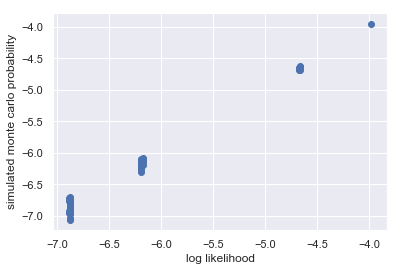

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(np.log(l), np.log(simulations))
plt.xlabel('log likelihood')
plt.ylabel('simulated monte carlo probability')

In [192]:
import numpy as np
np.corrcoef(np.log(l), np.log(simulations))

array([[1.        , 0.99583784],
       [0.99583784, 1.        ]])

In [193]:
r_squared = 1 - np.sum((np.array(l) - np.array(simulations))**2)/np.sum((np.array(simulations) - np.mean(np.array(simulations)))**2)

print(r_squared, 'r_squared')

0.9983294680025736 r_squared


In [7]:
states


### accelerate likelihood computation by changing a minor part of the tree.

[['l3', 'l3'],
 ['l1', 'l2'],
 ['l1', 1],
 ['l1', 2],
 ['l2', 4],
 [3, 'l2'],
 [5, 6]]

In [8]:
# # np.random.randint()
# coalescent_times = [2,5,6,8,13,19,29]
Mrbayes

In [9]:
# Pij(1, evecs, evals, evec_inv)
np.random.choice([0,1,2,3], p =[.2,.3,.4,.1])

1

In [138]:
import numpy.linalg as la
def Pij(t, evecs, evals, evec_inv):
    return evecs@np.diag(np.exp(evals*t))@evec_inv
    
def mc_probability(states, coalescent_times):
    mmap = {'A':0, 'C':1, 'G':2, 'T':3}
    global labels
    labels = [1]
    root_label = np.zeros(4)
    root_label[np.random.choice([0,1,2,3])] = 1
    mc_probability_recurse(states, coalescent_times, len(states), root_label)
    return labels
       
def mc_probability_recurse(states, coalescent_times, subroot, subroot_label):
    ###simulate from subroot with a fixed label
    
    left_child, right_child = states[subroot-1][0], states[subroot-1][1]
    
    if type(left_child) not in [int, float]:
        left_time = coalescent_times[subroot-1]
        prob_left = Pij(left_time, evecs, evals, evec_inv)@subroot_label
        simulated_leaf = np.random.choice(['A','C','G','T'], p = prob_left)
        if simulated_leaf == left_child:
            labels[0] = labels[0]*1
        else:
            labels[0] = 0
        
#         labels.add(left_child)
    else:
        left_time = coalescent_times[subroot-1] - coalescent_times[left_child-1]
        prob_left = Pij(left_time, evecs, evals, evec_inv)@subroot_label
        newlabelindex = np.random.choice([0,1,2,3], p = prob_left)
        newlabel = np.array([0,0,0,0])
        newlabel[newlabelindex] = 1
        mc_probability_recurse(states, coalescent_times, left_child, newlabel)

    if type(right_child) not in [int, float]:
        right_time = coalescent_times[subroot-1]
        prob_right = Pij(right_time, evecs, evals, evec_inv)@subroot_label
        
        simulated_leaf = np.random.choice(['A','C','G','T'], p = prob_right)
        if simulated_leaf == right_child:
            labels[0] = labels[0]*1
        else:
            labels[0] = 0    
#         labels.add(left_child)
    else:
        right_time = coalescent_times[subroot-1] - coalescent_times[right_child-1]
        prob_right = Pij(right_time, evecs, evals, evec_inv)@subroot_label
        newlabelindex = np.random.choice([0,1,2,3], p = prob_right)
        newlabel = np.array([0,0,0,0])
        newlabel[newlabelindex] = 1
        mc_probability_recurse(states, coalescent_times, right_child, newlabel)
        return
        
    
    
    

def compute_likelihood(states, site, subroot):

    left_child, right_child = states[subroot-1][0], states[subroot-1][1]
    left_child_likelihood, right_child_likelihood = 0,0
    left_t, right_t = -1,-1
    

    if type(left_child) not in [int, float]:
        init_state = np.zeros(4)
        init_state[mmap[left_child]] = 1
        left_child_likelihood = init_state
        left_t = coalescent_times[subroot-1]
    
    else:   
        left_child_likelihood = compute_likelihood(states, site, left_child)
        left_t = coalescent_times[subroot-1] - coalescent_times[left_child-1] 
        
    if type(right_child) not in [int, float]:
        init_state = np.zeros(4)
        init_state[mmap[right_child]] = 1
        right_t = coalescent_times[subroot-1]
        right_child_likelihood = init_state
        
        ###gradient corresponding to coalescent time?
        ###have the
    else:
        
        right_child_likelihood = compute_likelihood(states, site, right_child)
        right_t = coalescent_times[subroot-1] - coalescent_times[right_child-1]   
    likelihood = (Pij(left_t, evecs, evals, evec_inv)@left_child_likelihood) *\
    (Pij(right_t, evecs, evals, evec_inv)@right_child_likelihood)
    return likelihood

# mmap = {'A':0, 'C':1, 'G':2, 'T':3}
# q = np.ones((4,4))/3
# for i in range(4):
#     q[i,i]= -1
# evals, evecs = la.eig(q)
# evec_inv = la.inv(evecs)


def likelihood(states, root):
    likelihood_vec = compute_likelihood(states, 0, root)
    final_likelihood = 0.25*np.sum(likelihood_vec)
    return final_likelihood

In [47]:
coalescent_times = [3, 5, 9]
states = [['A', 'C'],['G', 'G'], [1, 2]]
likelihood(states, 3)

0.0039049585718129005

In [12]:
import numpy as np
np.log(0.003904)

-5.545753610431291

### Start MCMC sampling posterior

In [104]:
coalescent_times = [2,5,6,8,13,19,29]
states = [['G', 'G'],['C', 'A'], ['C', 1], ['C', 2], ['A', 4], [3,5], ['A', 6]]
likelihood(states, 7)

1.5479569532151385e-05

In [195]:
# np.random.rand()
# mu = 0.5
# q*mu
q

array([[-1.        ,  0.33333333,  0.33333333,  0.33333333],
       [ 0.33333333, -1.        ,  0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333, -1.        ,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333, -1.        ]])

In [175]:
import copy
states = [['G', 'G'],['C', 'A'], ['C', 1], ['C', 2], ['A', 4], [3,5], ['A', 6]]
coalescent_times = [.2,.5,.6,.8,1.3,1.9,2.9]
posterior_sampled = []
n=7 ######n = 8 actually, here n = 7 means that there are 7 coalescent events
prob_avg = 0
for i in range(20000):
    prev_state = copy.deepcopy(states)
    state_flag = markov_chain_forward(n+1,states)
    while not state_flag:
        state_flag = markov_chain_forward(n+1,states)
    new_state = copy.deepcopy(states)
    prev_likelihood = likelihood(list(prev_state), n)
    new_likelihood = likelihood(list(new_state), n)
    acceptance_prob = min(new_likelihood/prev_likelihood, 1)
    prob_avg += acceptance_prob
    U = np.random.rand()
    if U < acceptance_prob:
        ###accept
        if i > 10000:
            posterior_sampled.append(copy.deepcopy(states))
            states = copy.deepcopy(new_state)
    else:
        ###reject
        states = copy.deepcopy(prev_state)
print(prob_avg/20000)

0.7756558415338377


In [176]:
# for tree in posterior_sampled:
print(len(posterior_sampled))
    

7707


In [178]:
prior_sampled = []
states = [['G', 'G'],['C', 'A'], ['C', 1], ['C', 2], ['A', 4], [3,5], ['A', 6]]
coalescent_times = [.2,.5,.6,.8,1.3,1.9,2.9]
for i in range(7707):
    prev_state = copy.deepcopy(states)
    prior_sampled.append(prev_state)
    state_flag = markov_chain_forward(n+1,states)
    while not state_flag:
        state_flag = markov_chain_forward(n+1,states)
    

In [182]:
posterior_ll = []
ct = 0
for tree in posterior_sampled:
    ct += 1
    posterior_ll.append(likelihood(tree, 7))
    if ct %1000==0:
        print(ct//1000, 'iter_')

1 iter_
2 iter_
3 iter_
4 iter_
5 iter_
6 iter_
7 iter_


In [183]:
prior_ll = []
for tree in prior_sampled:
    prior_ll.append(likelihood(tree, 7))


In [184]:
posterior_ll = np.array(posterior_ll)
prior_ll = np.array(prior_ll)

Text(0.5,0,'log likelihood')

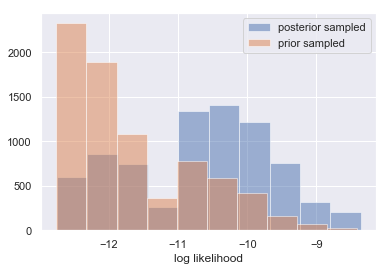

In [190]:
import seaborn as sns
sns.set()
plt.hist(np.log(posterior_ll),alpha = .5, label = 'posterior sampled')
plt.hist(np.log(prior_ll), alpha = .5, label = 'prior sampled')
plt.legend()
plt.xlabel('log likelihood')

In [200]:
states = [['G', 'G'],['C', 'A'], ['C', 1], ['C', 2], ['A', 4], [3,5], ['A', 6]]
print(np.log(likelihood(states, 7)))

-10.555622557558927


In [203]:
np.log(likelihood(posterior_sampled[np.argmax(posterior_ll)], 7))

-8.354450743754589

In [204]:
posterior_sampled[np.argmax(posterior_ll)]

[['A', 'A'], ['A', 1], ['C', 'C'], [3, 'C'], ['G', 'G'], [5, 4], [2, 6]]

In [ ]:
states = [['G', 'G'],['C', 'A'], ['C', 1], ['C', 2], ['A', 4], [3,5], ['A', 6]]

In [205]:
coalescent_times
###fix coalescent time, fix tree, simulation the data

[0.2, 0.5, 0.6, 0.8, 1.3, 1.9, 2.9]

In [213]:
q

array([[-1.        ,  0.33333333,  0.33333333,  0.33333333],
       [ 0.33333333, -1.        ,  0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333, -1.        ,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333, -1.        ]])

In [215]:
Pij(1, evecs, evals,evec_inv)

array([[0.44769785, 0.18410072, 0.18410072, 0.18410072],
       [0.18410072, 0.44769785, 0.18410072, 0.18410072],
       [0.18410072, 0.18410072, 0.44769785, 0.18410072],
       [0.18410072, 0.18410072, 0.18410072, 0.44769785]])

### variational using the prior distance function
### using swapping markov chain, (run again or improve time efficiency) TODO..
### getting stuck and sampling


#### starting about thinking branch length , hmc etc.. (gradients on branch length), marginalized on branch length (variational inference relying on automatic differentiation) another latent layer (one layer is effective population size, one layer is coalescent time)

gradient for coalescent time and likelihood
biggest problem for HMC, tree is easy to construct. cannot propose to have negative branch length (one proposal increasing decreasing branch length (negative branch length)), parmaterice increment. keep step size of Hamiltonian.

problem to compute the gradient, they use estimate of gradient, and improve the estimation. 
out win a problem that cannot compute the gradient

black-box 
simulated annealling, distance, exponential

doing greedy search

fixed unlabelled tree, uniformly labelling
distribution on = distribution of unlabelled * uniform
MCMC (save likelihood and posterior at each iteration)


In [199]:
np.log(np.mean(posterior_ll))

-10.21916362447655

MCMC()
###simulate data from the model, fix one tree, simulate data, compute the likelihood of different trees, hopefully convex function, with a peak on the simulated trees.

have a tree, needs to compute transition probability

matrix exponential, conditional on time, look at the corresponding row to
sample multinomial by row value

simulate with a lot of possible mutations (high mutation rate).


In [48]:
a = [[1],[2],[3]]
b = a.copy()
a[1][0]=5
c = a.copy()
print(b,c)
a[1]=6
print(c)

[[1], [5], [3]] [[1], [5], [3]]
[[1], [5], [3]]


In [311]:
states = [['G', 'G'],['C', 'A'], ['C', 1], ['C', 2], ['A', 4], [3,5], ['A', 6]]
while not markov_chain_forward(7, states):
    continue

0 1
5 A 5
not swapped
1 0
3 1 C
swapped


In [312]:
states

[['G', 'G'], ['C', 'A'], ['C', 'C'], [1, 2], ['A', 4], [3, 5], ['A', 6]]

In [330]:
240+24

264

In [331]:
264*1.5

396.0

In [332]:
396-360

36

In [333]:
268*1.5

402.0

In [334]:
402-360

42

In [335]:
13.6/1.5

9.066666666666666

In [336]:
13.6/5.5

2.4727272727272727

In [337]:
2.7*1.6

4.32

In [338]:
4.32*3

12.96

In [340]:
42.195/140*60

18.083571428571428

In [341]:
17+15/60

17.25

In [342]:
17.25/5*1.6

5.5200000000000005

In [1]:
-6+22+32+39+32
from math import log

In [3]:
def maxt_2(t2a, t2b):
    return - log(t2a/t2b)/(1/t2a - 1/t2b)

def maxt_1(t1a, t1b):
    return -log(t1a/t1b)/(1/t1a - 1/t1b)

In [4]:
maxt_2(92*1e-3, 100*1e-3)

0.09588885027990877

In [5]:
maxt_1(0.68, 0.81)

0.7412134644813827

In [107]:
range(1,1)

range(1, 1)

In [109]:
for i in range(-2,-5):
    print(i)

In [110]:
for j in range(-5,-1):
    print(j)

-5
-4
-3
-2


In [119]:
def isValidSudoku(board) -> bool:
        col_set = [[]]*9
        square_set = [[]]*9
        for i, row in enumerate(board):
            row_set = set()
            for j, col in enumerate(row):
                if col in row_set or col in col_set[j] or col in square_set[i//3+j//3*3]:
                    return False
                if col != ".":
                    row_set.add(col)
                    col_set[j] = col_set[j]+[col]
                    square_set[i//3+j//3*3] += [col]
        return True

In [120]:
board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]

In [121]:
isValidSudoku(board = board)

False

In [116]:
board2 = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]

In [117]:
isValidSudoku(board2)

False

In [122]:
[1] + [2]

[1, 2]

In [124]:
1/(21.09/(60+55))

5.4528212422949265

In [125]:
0.4528*60

27.168